In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
from keras.datasets import mnist
objects = mnist
(train_img,train_lab),(test_img,test_lab) = objects.load_data()

11490434/11490434 [==============================] - 0s 0us/step


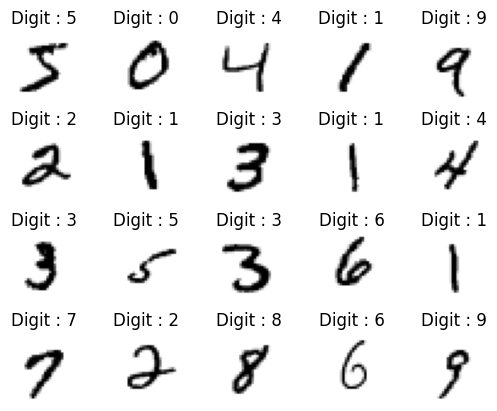

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

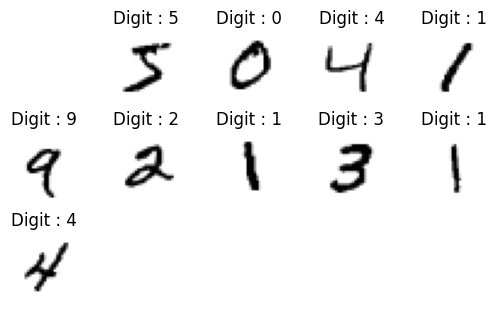

In [ ]:
for i in range(10):
  plt.subplot(4,5,i+2)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [ ]:
left = 0.125
right = 0.9
bottom = 0.1
top = 0.9
wspace = 0.2
hspace = 0.2

In [ ]:
print("Training images shape: ",train_img.shape)
print("Testing images shape: ",test_img.shape)

Training images shape:  (60000, 28, 28)
Testing images shape:  (10000, 28, 28)


Text(0.5, 0, 'Intensity')

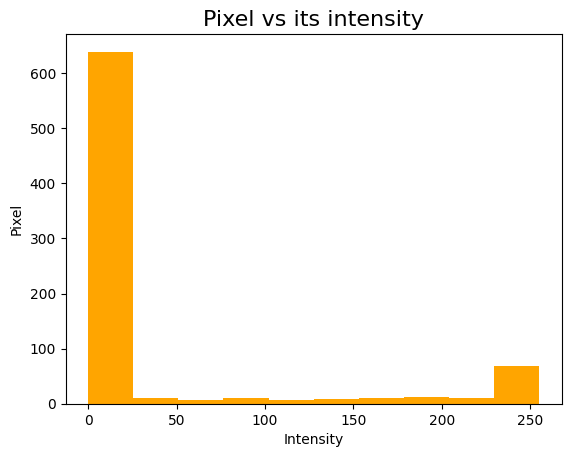

In [ ]:
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title("Pixel vs its intensity",fontsize=16)
plt.ylabel('Pixel')
plt.xlabel('Intensity')

In [ ]:
train_img = train_img/255.0
test_img = test_img/255.0

Text(0.5, 0, 'Intensity')

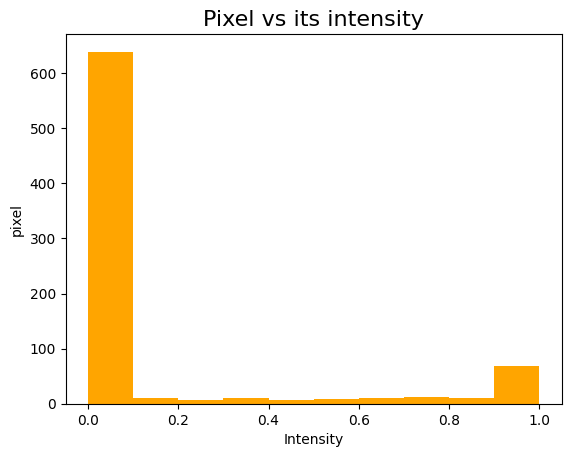

In [ ]:
plt.hist(train_img[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('pixel')
plt.xlabel('Intensity')

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model = Sequential()
input_layer = Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1 = Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2 = Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer = Dense(10,activation='softmax')
model.add(output_layer)

In [ ]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_img,train_lab,epochs=500)

Epoch 1/500
1875/1875 [==============================] - 14s 6ms/step - loss: 0.1828 - accuracy: 0.9441
Epoch 2/500
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0800 - accuracy: 0.9756
Epoch 3/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0561 - accuracy: 0.9825
Epoch 4/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0423 - accuracy: 0.9861
Epoch 5/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0333 - accuracy: 0.9889
Epoch 6/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0294 - accuracy: 0.9901
Epoch 7/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9927
Epoch 8/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 9/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0183 - accuracy: 0.9942
Epoch 10/500
1875/1875 [==============================] - 6s 3ms/step - 

In [ ]:
model.save('project.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loss_and_acc = model.evaluate(test_img,test_lab,verbose=2)
print("Test Lost",loss_and_acc[0])
print("Test accuracy",loss_and_acc[1])

313/313 - 1s - loss: 1.4891 - accuracy: 0.9842 - 1s/epoch - 3ms/step
Test Lost 1.4891287088394165
Test accuracy 0.9842000007629395


313/313 [==============================] - 1s 2ms/step
Predicted value:  7
Successful prediction


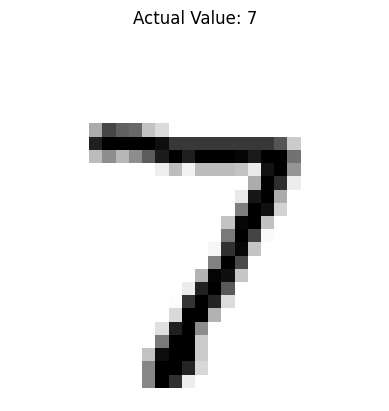

In [ ]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction = model.predict(test_img)
plt.axis('off')
print("Predicted value: ",np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print("Successful prediction")
else:
  print("Unsuccessful prediction")


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

def load_image(filename):
  img = load_img(filename,grayscale=True,target_size=(28,28))
  img= img_to_array(img)
  img = img.reshape(1,28,28)
  img = img.astype('float32')
  img = img/255.0
  return img

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving handwritten_digit_4.jpg to handwritten_digit_4.jpg


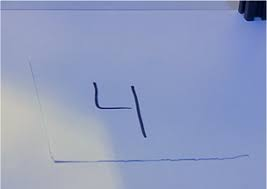

In [ ]:
from IPython.display import Image
Image('handwritten_digit_4.jpg',width=250,height=250)

In [ ]:
img = load_image('handwritten_digit_4.jpg')
new_model = tf.keras.models.load_model('project.h5')
digit = new_model.predict(img)
print('Predicted value: ',np.argmax(digit))

1/1 [==============================] - 0s 50ms/step
Predicted value:  5
